In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
df_train = pd.read_csv('/home/sanjana/Desktop/datasets/airbnb-recruiting-new-user-bookings/train_users_2.csv')
#df_test = pd.read_csv('')
sessions = pd.read_csv('/home/sanjana/Desktop/datasets/airbnb-recruiting-new-user-bookings/sessions.csv')
#usergrp = pd.read_csv('')
#countries = pd.read_csv('')
'''
print(df_train.country_destination.unique())

print("=============")

print((df_train.country_destination == 'US').sum())
print((df_train.country_destination == 'FR').sum())
print((df_train.country_destination == 'CA').sum())
print((df_train.country_destination == 'GB').sum())
print((df_train.country_destination == 'ES').sum())
print((df_train.country_destination == 'IT').sum())
print((df_train.country_destination == 'PT').sum())
print((df_train.country_destination == 'NL').sum())
print((df_train.country_destination == 'DE').sum())
print((df_train.country_destination == 'AU').sum())

print("==============")
print(df_train['country_destination'].describe())
'''

['NDF' 'US' 'other' 'FR' 'CA' 'GB' 'ES' 'IT' 'PT' 'NL' 'DE' 'AU']
62376
5023
1428
2324
2249
2835
217
762
1061
539
count     213451
unique        12
top          NDF
freq      124543
Name: country_destination, dtype: object


In [58]:
print(sessions.info())
sessions.dropna(subset = ["user_id"], inplace=True)
sessions.isnull().sum()
print("------------------")
arr=sessions['user_id'].unique()
print(len(arr))
list1=arr[:67742]
list2=arr[67742:]
print(len(list1), list1[0])
print(len(list2), list2[1])
sessions = sessions.drop(['action', 'action_type', 'action_detail', 'device_type'], axis = 1)
sessions.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10567737 entries, 0 to 10567736
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   user_id        object 
 1   action         object 
 2   action_type    object 
 3   action_detail  object 
 4   device_type    object 
 5   secs_elapsed   float64
dtypes: float64(1), object(5)
memory usage: 483.8+ MB
None
------------------
135483
67742 d1mm9tcy42
67741 nfvm7fodul


,user_id,secs_elapsed
0,d1mm9tcy42,319.0
1,d1mm9tcy42,67753.0
2,d1mm9tcy42,301.0
3,d1mm9tcy42,22141.0
4,d1mm9tcy42,435.0


[62376, 5023, 1428, 2324, 2249, 2835, 217, 762, 1061, 539]
['US', 'FR', 'CA', 'GB', 'ES', 'IT', 'PT', 'NL', 'DE', 'AU']


<BarContainer object of 10 artists>

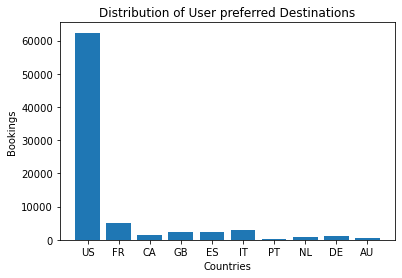

In [3]:
count=[62376,5023,1428,2324,2249,2835,217,762,1061,539]
cnty=['US', 'FR', 'CA', 'GB', 'ES', 'IT', 'PT', 'NL', 'DE', 'AU']
print(count)
print(cnty)
from matplotlib import pyplot as plt
plt.title('Distribution of User preferred Destinations')
plt.xlabel('Countries')
plt.ylabel('Bookings')
plt.bar(cnty, count)


In [4]:
df_train.isnull().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

In [5]:
print(df_train.head())

           id date_account_created  timestamp_first_active date_first_booking  \
0  gxn3p5htnn           2010-06-28          20090319043255                NaN   
1  820tgsjxq7           2011-05-25          20090523174809                NaN   
2  4ft3gnwmtx           2010-09-28          20090609231247         2010-08-02   
3  bjjt8pjhuk           2011-12-05          20091031060129         2012-09-08   
4  87mebub9p4           2010-09-14          20091208061105         2010-02-18   

      gender   age signup_method  signup_flow language affiliate_channel  \
0  -unknown-   NaN      facebook            0       en            direct   
1       MALE  38.0      facebook            0       en               seo   
2     FEMALE  56.0         basic            3       en            direct   
3     FEMALE  42.0      facebook            0       en            direct   
4  -unknown-  41.0         basic            0       en            direct   

  affiliate_provider first_affiliate_tracked signup_app 

In [6]:
df_train['first_affiliate_tracked'].value_counts()

untracked        109232
linked            46287
omg               43982
tracked-other      6156
product            1556
marketing           139
local ops            34
Name: first_affiliate_tracked, dtype: int64

In [7]:
df_train['first_affiliate_tracked'].fillna("untracked",inplace = True)

df_train.describe()

,timestamp_first_active,age,signup_flow
count,2.134510e+05,125461.000000,213451.000000
mean,2.013085e+13,49.668335,3.267387
std,9.253717e+09,155.666612,7.637707
min,2.009032e+13,1.000000,0.000000
25%,2.012123e+13,28.000000,0.000000
50%,2.013091e+13,34.000000,0.000000
75%,2.014031e+13,43.000000,0.000000
max,2.014063e+13,2014.000000,25.000000


In [8]:
df_train.drop(df_train[df_train['age'] > 120].index, inplace = True)
df_train.drop(df_train[df_train['age'] < 18].index, inplace = True)
df_train['age'].describe()
df_train['age'].fillna(df_train['age'].mean(),inplace = True)


df_train['date_first_booking'] = df_train['date_first_booking'].apply(lambda x: 1 if not pd.isnull(x) else 0)
df_train['age'].fillna(df_train['age'].mean(),inplace = True)

df_train.isnull().sum()

df_train['date_first_booking'].head()

0    0
1    0
2    1
3    1
4    1
Name: date_first_booking, dtype: int64

In [9]:
#df_train['date_account_created']=pd.to_datetime(df_train["date_account_created"])
df_train=df_train.drop(['date_account_created'],axis=1)

In [10]:
df_train=df_train.drop(['id'],axis=1)

In [11]:
df_train_names=df_train
df_train_names.head()
new_train_ann= df_train[['country_destination', 'signup_method','date_first_booking', 'age','gender',
                      'language']].copy()
print(new_train_ann.head())

  country_destination signup_method  date_first_booking        age     gender  \
0                 NDF      facebook                   0  37.443857  -unknown-   
1                 NDF      facebook                   0  38.000000       MALE   
2                  US         basic                   1  56.000000     FEMALE   
3               other      facebook                   1  42.000000     FEMALE   
4                  US         basic                   1  41.000000  -unknown-   

  language  
0       en  
1       en  
2       en  
3       en  
4       en  


In [12]:
from sklearn.preprocessing import LabelEncoder
gender=LabelEncoder()
df_train['gender']=gender.fit_transform(df_train['gender'])
language=LabelEncoder()
df_train['language']=language.fit_transform(df_train['language'])
affiliate_channel=LabelEncoder()
df_train['affiliate_channel']=affiliate_channel.fit_transform(df_train['affiliate_channel'])
affiliate_provider=LabelEncoder()
df_train['affiliate_provider']=affiliate_provider.fit_transform(df_train['affiliate_provider'])
first_affiliate_tracked=LabelEncoder()
df_train['first_affiliate_tracked']=first_affiliate_tracked.fit_transform(df_train['first_affiliate_tracked'])
signup_app=LabelEncoder()
df_train['signup_app']=signup_app.fit_transform(df_train['signup_app'])
signup_method=LabelEncoder()
df_train['signup_method']=signup_method.fit_transform(df_train['signup_method'])
first_device_type=LabelEncoder()
df_train['first_device_type']=first_device_type.fit_transform(df_train['first_device_type'])

country_destination=LabelEncoder()
df_train['country_destination']=country_destination.fit_transform(df_train['country_destination'])

first_browser=LabelEncoder()
df_train['first_browser']=first_browser.fit_transform(df_train['first_browser'])
df_train.head(5)

,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,20090319043255,0,0,37.443857,1,0,5,2,4,6,2,3,8,7
1,20090523174809,0,2,38.000000,1,0,5,7,8,6,2,3,8,7
2,20090609231247,1,1,56.000000,0,3,5,2,4,6,2,6,21,10
3,20091031060129,1,1,42.000000,1,0,5,2,4,6,2,3,17,11
4,20091208061105,1,0,41.000000,0,0,5,2,4,6,2,3,8,10


In [13]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
gender = le.fit_transform(list(df_train["gender"]))

In [14]:
col_name="country_destination"
first_col=df_train.pop(col_name)
df_train.insert(0, col_name, first_col)

In [15]:
from sklearn.model_selection import train_test_split
X = df_train.iloc[:,1:17]
Y = df_train.iloc[:,0]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.4, random_state = 0)
print(x_train.columns)
print(len(x_train),len(x_test),len(y_train),len(y_test))

Index(['timestamp_first_active', 'date_first_booking', 'gender', 'age',
       'signup_method', 'signup_flow', 'language', 'affiliate_channel',
       'affiliate_provider', 'first_affiliate_tracked', 'signup_app',
       'first_device_type', 'first_browser'],
      dtype='object')
127507 85005 127507 85005


In [16]:
df_train.isnull().sum()
df_train.head()

,country_destination,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,7,20090319043255,0,0,37.443857,1,0,5,2,4,6,2,3,8
1,7,20090523174809,0,2,38.000000,1,0,5,7,8,6,2,3,8
2,10,20090609231247,1,1,56.000000,0,3,5,2,4,6,2,6,21
3,11,20091031060129,1,1,42.000000,1,0,5,2,4,6,2,3,17
4,10,20091208061105,1,0,41.000000,0,0,5,2,4,6,2,3,8


In [17]:
'''
import seaborn as sns
#get correlations of each features in dataset
corrmat = df_train.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,10))
#plot heat map
g=sns.heatmap(df_train[top_corr_features].corr(),annot=True,cmap="RdYlGn")
'''

'\nimport seaborn as sns\n#get correlations of each features in dataset\ncorrmat = df_train.corr()\ntop_corr_features = corrmat.index\nplt.figure(figsize=(20,10))\n#plot heat map\ng=sns.heatmap(df_train[top_corr_features].corr(),annot=True,cmap="RdYlGn")\n'

In [18]:
'''
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x_train,y_train)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances=x_train.columns
feat_importances.nlargest(15).plot(kind='bar',color='olive')
plt.show()
'''

"\nfrom sklearn.ensemble import ExtraTreesClassifier\nimport matplotlib.pyplot as plt\nmodel = ExtraTreesClassifier()\nmodel.fit(x_train,y_train)\nprint(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers\n#plot graph of feature importances for better visualization\nfeat_importances=x_train.columns\nfeat_importances.nlargest(15).plot(kind='bar',color='olive')\nplt.show()\n"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10567737 entries, 0 to 10567736
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   user_id        object 
 1   action         object 
 2   action_type    object 
 3   action_detail  object 
 4   device_type    object 
 5   secs_elapsed   float64
dtypes: float64(1), object(5)
memory usage: 483.8+ MB
None


user_id                0
action             79480
action_type      1122957
action_detail    1122957
device_type            0
secs_elapsed      135483
dtype: int64

In [42]:
#print(sessions.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10533241 entries, 0 to 10567736
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   user_id        object 
 1   action         object 
 2   action_type    object 
 3   action_detail  object 
 4   device_type    object 
 5   secs_elapsed   float64
dtypes: float64(1), object(5)
memory usage: 562.5+ MB
None


135483
67742 d1mm9tcy42
67741 nfvm7fodul


,user_id,secs_elapsed
0,d1mm9tcy42,319.0
1,d1mm9tcy42,67753.0
2,d1mm9tcy42,301.0
3,d1mm9tcy42,22141.0
4,d1mm9tcy42,435.0


KeyboardInterrupt: 

In [55]:
print(sum_tot[0])

IndexError: list index out of range

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import time
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

lm = linear_model.LogisticRegression(multi_class='multinomial',solver='saga')

lm.fit(x_train, y_train)
lm.score(x_test, y_test)
y_pred = lm.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))



Accuracy: 0.5827657196635492


In [29]:
new_train= df_train[['country_destination', 'signup_method','date_first_booking', 'age','gender',
                      'language']].copy()

from sklearn.model_selection import train_test_split
X2 = new_train.iloc[:,1:17]
Y2 = new_train.iloc[:,0]
x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, Y2, test_size = 0.4, random_state = 0)

print(len(x_train2),len(x_test2),len(y_train2),len(y_test2))

lm2 = linear_model.LogisticRegression(multi_class='ovr', solver='liblinear')
lm2.fit(x_train2, y_train2)
y_pred_lm = lm2.predict(x_test2)
print("Log Reg=",metrics.accuracy_score(y_test2, y_pred_lm))

kfold = KFold(n_splits=10, shuffle=True)
results = cross_val_score(lm2, x_train2, y_train2, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


127507 85005 127507 85005
Log Reg= 0.875007352508676
Baseline: 87.62% (0.26%)


In [30]:

clf2 = DecisionTreeClassifier()
clf2 = clf2.fit(x_train2,y_train2)
y_pred_dt = clf2.predict(x_test2)
print("Accuracy Dec Tree:",metrics.accuracy_score(y_test2, y_pred_dt))

kfold = KFold(n_splits=10, shuffle=True)
results = cross_val_score(clf2, x_train2, y_train2, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(x_train2, y_train2)
y_pred_knn = knn.predict(x_test2)
print("KNN = ",metrics.accuracy_score(y_test2, y_pred_knn))

kfold = KFold(n_splits=10, shuffle=True)
results = cross_val_score(knn, x_train2, y_train2, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report    
from sklearn.metrics import accuracy_score

classifier= RandomForestClassifier(n_estimators= 250, criterion="entropy")
classifier.fit(x_train2, y_train2)
y_pred_rf= classifier.predict(x_test2)
from sklearn.metrics import confusion_matrix
#print(confusion_matrix(y_test2,y_pred_rf))
#print(classification_report(y_test2,y_pred_rf))
print("RF=",accuracy_score(y_test2, y_pred_rf))

kfold = KFold(n_splits=10, shuffle=True)
results = cross_val_score(classifier, x_train2, y_train2, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy Dec Tree: 0.8729015940238809
Baseline: 87.41% (0.23%)
KNN =  0.8717251926357273
Baseline: 87.28% (0.22%)
RF= 0.8737133109817069
Baseline: 87.49% (0.27%)


In [31]:
import warnings

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, f1_score, log_loss
from sklearn.model_selection import train_test_split, KFold, cross_val_score

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier
LogReg_clf = LogisticRegression()
DTree_clf = DecisionTreeClassifier()
SVC_clf = SVC()
LogReg_clf.fit(x_train2, y_train2)
DTree_clf.fit(x_train2, y_train2)
SVC_clf.fit(x_train2, y_train2)

LogReg_pred = LogReg_clf.predict(x_test2)
DTree_pred = DTree_clf.predict(x_test2)
SVC_pred = SVC_clf.predict(x_test2)

averaged_preds = (LogReg_pred + DTree_pred + SVC_pred)//3
acc = accuracy_score(y_test2, averaged_preds)
print("Avg acc=" ,acc)

voting_clf = VotingClassifier(estimators=[('SVC', SVC_clf), ('DTree', DTree_clf), ('LogReg', LogReg_clf)], voting='hard')
voting_clf.fit(x_train2, y_train2)
preds = voting_clf.predict(x_test2)
acc = accuracy_score(y_test2, preds)

print("voting= " + str(acc))

kfold = KFold(n_splits=10, shuffle=True)
results = cross_val_score(voting_clf, x_train2, y_train2, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

/home/sanjana/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Avg acc= 0.8723839774130934


/home/sanjana/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


voting= 0.8746544320922298


/home/sanjana/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/sanjana/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model

Baseline: 87.58% (0.26%)


In [25]:
acc2 = accuracy_score(y_test2, SVC_pred)
print(acc2)


0.8747132521616375


In [26]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# training a Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(x_train2, y_train2)
gnb_predictions = gnb.predict(x_test2)
# accuracy on X_test
accuracy = gnb.score(x_test2, y_test2)
print("NV=",accuracy)
# creating a confusion matrix
cm = confusion_matrix(y_test, gnb_predictions)

NV= 0.8687018410681725
